In [5]:
import requests
response = requests.get('http://www.baidu.com/')
print(type(response))
print(response.status_code)
print(type(response.text))
print(response.text)
print(response.cookies)

<class 'requests.models.Response'>
200
<class 'str'>
<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=http://s1.bdstatic.com/r/www/cache/bdorz/baidu.min.css><title>ç¾åº¦ä¸ä¸ï¼ä½ å°±ç¥é</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off 

# 各种请求方式

In [6]:
import requests
requests.post('http://httpbin.org/post')
requests.put('HTTP://httpbin.org/put')
requests.delete('http://httpbin.org/delete')
requests.head('http://httpbin.org/get')
requests.options('http://httpbin.org')

<Response [200]>

#  请求

## 基本的GET请求

In [12]:
import requests
response = requests.get('http://httpbin.org/get')
print(response.text)

{"args":{},"headers":{"Accept":"*/*","Accept-Encoding":"gzip, deflate","Connection":"close","Host":"httpbin.org","User-Agent":"python-requests/2.18.4"},"origin":"223.223.194.200","url":"http://httpbin.org/get"}



## 带参数的get请求

In [16]:
# 用 ？  和   & 进行拼接
import requests
response = requests.get('http://httpbin.org/get?name=germey&age=22')
print(response.text)

{"args":{"age":"22","name":"germey"},"headers":{"Accept":"*/*","Accept-Encoding":"gzip, deflate","Connection":"close","Host":"httpbin.org","User-Agent":"python-requests/2.18.4"},"origin":"223.223.194.200","url":"http://httpbin.org/get?name=germey&age=22"}



In [18]:
# 另一种方法
import requests
data = {
    'name':'kangze',
    'age':22
}
response = requests.get('http://httpbin.org/get',params=data)
print(response.text)

{"args":{"age":"22","name":"kangze"},"headers":{"Accept":"*/*","Accept-Encoding":"gzip, deflate","Connection":"close","Host":"httpbin.org","User-Agent":"python-requests/2.18.4"},"origin":"223.223.194.200","url":"http://httpbin.org/get?age=22&name=kangze"}



# 解析json

In [26]:
import requests
response = requests.get('http://httpbin.org/get')
print(type(response.text))
print(response.json())
print(type(response.json()))
print(response.text)
#---------
import json
print(json.loads(response.text))
print(type(json.loads(response.text)))

<class 'str'>
{'url': 'http://httpbin.org/get', 'headers': {'User-Agent': 'python-requests/2.18.4', 'Host': 'httpbin.org', 'Accept-Encoding': 'gzip, deflate', 'Connection': 'close', 'Accept': '*/*'}, 'origin': '223.223.194.200', 'args': {}}
<class 'dict'>
{"args":{},"headers":{"Accept":"*/*","Accept-Encoding":"gzip, deflate","Connection":"close","Host":"httpbin.org","User-Agent":"python-requests/2.18.4"},"origin":"223.223.194.200","url":"http://httpbin.org/get"}

{'url': 'http://httpbin.org/get', 'headers': {'User-Agent': 'python-requests/2.18.4', 'Host': 'httpbin.org', 'Accept-Encoding': 'gzip, deflate', 'Connection': 'close', 'Accept': '*/*'}, 'origin': '223.223.194.200', 'args': {}}
<class 'dict'>


# 获取二进制数据

In [29]:
import requests
response = requests.get('https://github.com/favicon.ico')
print(type(response.text),type(response.content))
print(response.text)
print(response.content)

<class 'str'> <class 'bytes'>
:�������O                                L������                                      ������                                        ������!                                ������4                                @���8���          
��������333                                                ���t�������+R������t                                                                `������R����������                                                                    �������������\                                                                        G������������                                                                    

In [30]:
import requests
response = requests.get('https://github.com/favicon.ico')
with open('github.ico','wb') as f:
    f.write(response.content)
    f.close()

# 添加headers

In [34]:
# 不加浏览器信息会报错
import requests
response = requests.get('https://www.zhihu.com/explore')
print(response.text)

<html>
<head><title>400 Bad Request</title></head>
<body bgcolor="white">
<center><h1>400 Bad Request</h1></center>
<hr><center>openresty</center>
</body>
</html>



In [36]:
import requests
headers = {
   'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
}
response = requests.get('https://www.zhihu.com/explore',headers=headers)
print(response.text)

<!DOCTYPE html>
<html lang="zh-CN" dropEffect="none" class="no-js no-auth ">
<head>
<meta charset="utf-8" />

<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<meta name="renderer" content="webkit" />
<meta http-equiv="X-ZA-Response-Id" content="73db020a1c6d1531a0c4202e8bf32cb0">

<meta http-equiv="X-ZA-Experiment" content="default:None,ge3:ge3_9,ge2:ge2_1,nwebQAGrowth:experiment,is_office:false,nweb_growth_people:default,is_show_unicom_free_entry:unicom_free_entry_off,app_store_rate_dialog:close,android_profile_panel:panel_b,search_advert_position:1,live_store:ls_a2_b2_c1_f2,nweb_search:nweb_search_heifetz,search_hybrid_tabs:pin-3#album-7,new_live_feed_mediacard:new,hybrid_zhmore_video:yes,new_mobile_column_appheader:new_header,search_tab:collapse,rt:y,ad_r:a,growth_search:s2,qaweb_related_readings_content_control:close,android_pass_through_push:all,new_sign_bg:new,new_mobile_app_header:true,np:1,android_search_tab_style:search_tab_style_b,u_re:0,android_db_recommend_a

# 基本post请求

In [40]:
import requests

data = {
    'user[email]':'xingkangze@addnewer.com',
    'user[password]':'z13233267743'
}
response = requests.post('https://www.github.com',data=data)
print(response.text)







<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://assets-cdn.github.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">



  <link crossorigin="anonymous" media="all" integrity="sha512-pCRDtdb3GlUU48h+oRJVA8f0GddrLnU97wB7mHQ7q6c40vMbMMZsFdk0IMhkUFRqw1M/y4EkWxtaKwfeFezOkQ==" rel="stylesheet" href="https://assets-cdn.github.com/assets/frameworks-73f533b7cc08a9d040e601cfd38fa585.css" />
  <link crossorigin="anonymous" media="all" integrity="sha512-14TBSJ7eyH5JJjEOL+FAw7DyPah9w/51ZTdfZ4y3NSqbMqs15xbBQ76yFHkRCUVizpkm+k+sO3UgZLg9BL9W

In [42]:
# 我们也可以传入一个headers
import requests 
data={
    'user[email]':'xingkangze@addnewer.com',
    'user[password]':'z13233267743'
}
headers={
     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
}
response = requests.post('http://www.github.com',data=data,headers=headers)
print(response.text)







<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://assets-cdn.github.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">



  <link crossorigin="anonymous" media="all" integrity="sha512-pCRDtdb3GlUU48h+oRJVA8f0GddrLnU97wB7mHQ7q6c40vMbMMZsFdk0IMhkUFRqw1M/y4EkWxtaKwfeFezOkQ==" rel="stylesheet" href="https://assets-cdn.github.com/assets/frameworks-73f533b7cc08a9d040e601cfd38fa585.css" />
  <link crossorigin="anonymous" media="all" integrity="sha512-14TBSJ7eyH5JJjEOL+FAw7DyPah9w/51ZTdfZ4y3NSqbMqs15xbBQ76yFHkRCUVizpkm+k+sO3UgZLg9BL9W

# 响应
## response属性

In [54]:
import requests
headers={
     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
}
response = requests.get('http://www.jianshu.com',headers=headers)
print(type(response.status_code),response.status_code )
print(type(response.headers),response.headers)
print(type(response.cookies),response.cookies)
print(type(response.url),response.url)
print(type(response.history),response.history)

<class 'int'> 200
<class 'requests.structures.CaseInsensitiveDict'> {'Content-Type': 'text/html; charset=utf-8', 'X-Request-Id': '0aa459a7-b1c8-44ff-9337-2341a5af3914', 'Server': 'Tengine', 'X-XSS-Protection': '1; mode=block', 'X-Frame-Options': 'DENY', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Date': 'Mon, 23 Jul 2018 09:23:40 GMT', 'X-Runtime': '0.009037', 'X-Via': '1.1 PSfjfzdx2mj93:9 (Cdn Cache Server V2.0), 1.1 PSbjzwdx3au198:0 (Cdn Cache Server V2.0)', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Cache-Control': 'max-age=0, private, must-revalidate', 'X-Dscp-Value': '0', 'Content-Encoding': 'gzip', 'ETag': 'W/"b0cf803c3bfff64546ced4bed36305a9"', 'Set-Cookie': 'locale=zh-CN; path=/', 'X-Content-Type-Options': 'nosniff'}
<class 'requests.cookies.RequestsCookieJar'> <RequestsCookieJar[<Cookie locale=zh-CN for www.jianshu.com/>]>
<class 'str'> https://www.jianshu.com/
<class 'list'> [<Response [301]>]


# 状态码 判断

In [55]:
# 信息性状态码
100: ('continue',),
101: ('switching_protocols',),
102: ('processing',),
103: ('checkpoint',),
122: ('uri_too_long', 'request_uri_too_long'),
 
# 成功状态码
200: ('ok', 'okay', 'all_ok', 'all_okay', 'all_good', '\\o/', '✓'),
201: ('created',),
202: ('accepted',),
203: ('non_authoritative_info', 'non_authoritative_information'),
204: ('no_content',),
205: ('reset_content', 'reset'),
206: ('partial_content', 'partial'),
207: ('multi_status', 'multiple_status', 'multi_stati', 'multiple_stati'),
208: ('already_reported',),
226: ('im_used',),
 
# 重定向状态码
300: ('multiple_choices',),
301: ('moved_permanently', 'moved', '\\o-'),
302: ('found',),
303: ('see_other', 'other'),
304: ('not_modified',),
305: ('use_proxy',),
306: ('switch_proxy',),
307: ('temporary_redirect', 'temporary_moved', 'temporary'),
308: ('permanent_redirect',
      'resume_incomplete', 'resume',), # These 2 to be removed in 3.0
 
# 客户端错误状态码
400: ('bad_request', 'bad'),
401: ('unauthorized',),
402: ('payment_required', 'payment'),
403: ('forbidden',),
404: ('not_found', '-o-'),
405: ('method_not_allowed', 'not_allowed'),
406: ('not_acceptable',),
407: ('proxy_authentication_required', 'proxy_auth', 'proxy_authentication'),
408: ('request_timeout', 'timeout'),
409: ('conflict',),
410: ('gone',),
411: ('length_required',),
412: ('precondition_failed', 'precondition'),
413: ('request_entity_too_large',),
414: ('request_uri_too_large',),
415: ('unsupported_media_type', 'unsupported_media', 'media_type'),
416: ('requested_range_not_satisfiable', 'requested_range', 'range_not_satisfiable'),
417: ('expectation_failed',),
418: ('im_a_teapot', 'teapot', 'i_am_a_teapot'),
421: ('misdirected_request',),
422: ('unprocessable_entity', 'unprocessable'),
423: ('locked',),
424: ('failed_dependency', 'dependency'),
425: ('unordered_collection', 'unordered'),
426: ('upgrade_required', 'upgrade'),
428: ('precondition_required', 'precondition'),
429: ('too_many_requests', 'too_many'),
431: ('header_fields_too_large', 'fields_too_large'),
444: ('no_response', 'none'),
449: ('retry_with', 'retry'),
450: ('blocked_by_windows_parental_controls', 'parental_controls'),
451: ('unavailable_for_legal_reasons', 'legal_reasons'),
499: ('client_closed_request',),
 
# 服务端错误状态码
500: ('internal_server_error', 'server_error', '/o\\', '✗'),
501: ('not_implemented',),
502: ('bad_gateway',),
503: ('service_unavailable', 'unavailable'),
504: ('gateway_timeout',),
505: ('http_version_not_supported', 'http_version'),
506: ('variant_also_negotiates',),
507: ('insufficient_storage',),
509: ('bandwidth_limit_exceeded', 'bandwidth'),
510: ('not_extended',),
511: ('network_authentication_required', 'network_auth', 'network_authentication')

SyntaxError: invalid syntax (<ipython-input-55-d3b72cbfbbf9>, line 2)

In [3]:
import requests
 
headers={
     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
}
response = requests.get('http://www.jianshu.com',headers=headers)
exit() if not response.status_code == 200 else print('successful')
print(response.status_code)

successful
200


In [20]:
import requests
 
headers={
     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
}
response = requests.get('http://www.jianshu.com/hello.html',headers=headers)
if  response.status_code == requests.codes.not_found: 
    print('456')
else: 
    print('404 ')
print(response.status_code)


456
404


# 高级操作
## 文件上传

In [21]:
import requests
files = {'file':open('github.ico','rb')}
response = requests.post('http://httpbin.org/post',files=files)
print(response.text)

{"args":{},"data":"","files":{"file":"data:application/octet-stream;base64,AAABAAIAEBAAAAEAIAAoBQAAJgAAACAgAAABACAAKBQAAE4FAAAoAAAAEAAAACAAAAABACAAAAAAAAAFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABERE3YTExPFDg4OEgAAAAAAAAAADw8PERERFLETExNpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQUFJYTExT8ExMU7QAAABkAAAAAAAAAAAAAABgVFRf/FRUX/xERE4UAAAAAAAAAAAAAAAAAAAAAAAAAABEREsETExTuERERHhAQEBAAAAAAAAAAAAAAAAAAAAANExMU9RUVF/8VFRf/EREUrwAAAAAAAAAAAAAAABQUFJkVFRf/BgYRLA4ODlwPDw/BDw8PIgAAAAAAAAAADw8PNBAQEP8VFRf/FRUX/xUVF/8UFBSPAAAAABAQEDAPDQ//AAAA+QEBAe0CAgL/AgIC9g4ODjgAAAAAAAAAAAgICEACAgLrFRUX/xUVF/8VFRf/FRUX/xERES0UFBWcFBQV/wEBAfwPDxH7DQ0ROwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0NEjoTExTnFRUX/xUVF/8SEhKaExMT2RUVF/8VFRf/ExMTTwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAERERTBUVF/8VFRf/ExMT2hMTFPYVFRf/FBQU8AAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAITExTxFRUX/xMTFPYTExT3FRUX/xQUFOEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFBQU4RUVF/8TExT3FBQU3hUVF/8TExT5Dw8PIQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

# 获取cookie

In [24]:
import requests
response = requests.get('https://www.baidu.com')
print(type(response.cookies))
print(response.cookies)
for key ,value in response.cookies.items():
    print(key+'='+value)

<class 'requests.cookies.RequestsCookieJar'>
<RequestsCookieJar[<Cookie BDORZ=27315 for .baidu.com/>]>
BDORZ=27315


# 会话维持

In [30]:
# 模拟登录
# 因为这样就相当于定义了两个request   所以 cookie没有
import requests 
requests.get('http://httpbin.org/cookies/set/number/123465789')
response = requests.get('http://httpbin.org/cookies')
print(response.text)

{"cookies":{}}



In [31]:
# 用session
import requests
s = requests.Session()
s.get('http://httpbin.org/cookies/set/number/123465789')
response = s.get('http://httpbin.org/cookies')
print(response.text)

{"cookies":{"number":"123465789"}}



# 证书验证

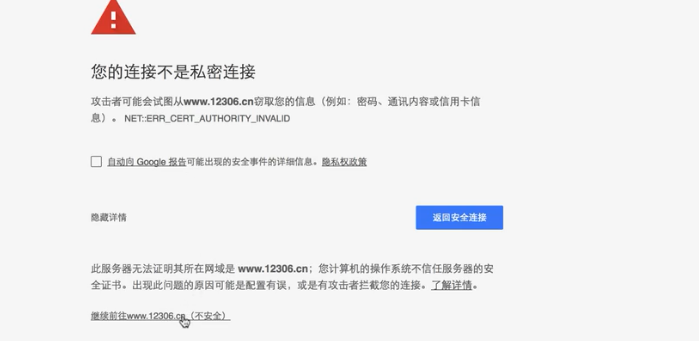

In [34]:
import requests
response = requests.get('https://www.12306.cn')
print(response.status_code)
# ssl错误

SSLError: HTTPSConnectionPool(host='www.12306.cn', port=443): Max retries exceeded with url: / (Caused by SSLError(CertificateError("hostname 'www.12306.cn' doesn't match either of 'webssl.chinanetcenter.com', 'i.l.inmobicdn.net', '*.fn-mart.com', 'www.1zhe.com', '*.pinganfang.com', '*.anhouse.com', 'dl.jphbpk.gxpan.cn', 'dl.givingtales.gxpan.cn', 'dl.toyblast.gxpan.cn', 'dl.sds.gxpan.cn', 'download.ctrip.com', 'mh.tiancity.com', 'app.4399.cn', 'i.4399.cn', 'm.4399.cn', 'a.4399.cn', 'cdn.hxjyios.iwan4399.com', 'ios.hxjy.iwan4399.com', 'gjzx.gjzq.com.cn', 'f.3000test.com', 'tj.img4399.com', '*.zhe800.com', '*.qiyipic.com', '*.vxinyou.com', '*.gdjh.vxinyou.com', '*.3000.com', 'pay.game2.cn', 'static1.j.cn', 'static2.j.cn', 'static3.j.cn', 'static4.j.cn', 'video1.j.cn', 'video2.j.cn', 'video3.j.cn', 'online.j.cn', 'playback.live.j.cn', 'audio1.guang.j.cn', 'audio2.guang.j.cn', 'audio3.guang.j.cn', 'img1.guang.j.cn', 'img2.guang.j.cn', 'img3.guang.j.cn', 'img4.guang.j.cn', 'img5.guang.j.cn', 'img6.guang.j.cn', '*.4399youpai.com', 'w.tancdn.com', '*.3000api.com', 'static11.j.cn', '*.kuyinyun.com', '*.kuyin123.com', '*.diyring.cc', '3000test.com', '*.3000test.com', 'www.3387.com', 'bbs.4399.cn', '*.cankaoxiaoxi.com', '*.service.kugou.com', 'test.macauslot.com', 'testm.macauslot.com', 'testtran.macauslot.com', 'xiuxiu.huodong.meitu.com', '*.meitu.com', '*.meitudata.com', '*.wheetalk.com', '*.shanliaoapp.com', 'xiuxiu.web.meitu.com', 'api.account.meitu.com', 'open.web.meitu.com', 'id.api.meitu.com', 'api.makeup.meitu.com', 'im.live.meipai.com', '*.meipai.com', 'm.macauslot.com', 'www.macauslot.com', 'web.macauslot.com', 'translation.macauslot.com', 'img1.homekoocdn.com', 'cdn.homekoocdn.com', 'cdn1.homekoocdn.com', 'cdn2.homekoocdn.com', 'cdn3.homekoocdn.com', 'cdn4.homekoocdn.com', 'img.homekoocdn.com', 'img2.homekoocdn.com', 'img3.homekoocdn.com', 'img4.homekoocdn.com', '*.macauslot.com', '*.samsungapps.com', 'auto.tancdn.com', '*.winbo.top', 'static.bst.meitu.com', 'api.xiuxiu.meitu.com', 'api.photo.meituyun.com', 'h5.selfiecity.meitu.com', 'api.selfiecity.meitu.com', 'h5.beautymaster.meiyan.com', 'api.beautymaster.meiyan.com', 'www.yawenb.com', 'm.yawenb.com', 'www.biqugg.com', 'www.dawenxue.net', 'cpg.meitubase.com', 'www.qushuba.com', 'www.ranwena.com', 'www.u8xsw.com', '*.4399sy.com', 'ms.awqsaged.cn', 'fanxing2.kugou.com', 'fanxing.kugou.com', 'sso.56.com', 'upload.qf.56.com', 'sso.qianfan.tv', 'cdn.danmu.56.com', 'www-ppd.hermes.cn', 'www-uat.hermes.cn', 'www-ts2.hermes.cn', 'www-tst.hermes.cn', '*.syyx.com', 'img.wgeqr.cn', 'img.wgewa.cn', 'img.09mk.cn', 'img.85nh.cn', '*.zhuoquapp.com', 'img.dtmpekda8.cn', 'img.etmpekda6.cn', '*.5054399.com', '*.aiwan4399.com', 'user.beevideo.bestv.com.cn', '*.3839.com', '*.actdelivery.net', '*.4399.cn'",),))

In [37]:
import requests 
#加这句话就是不让他提示警告
from requests.packages import urllib3
urllib3.disable_warnings()
#是否要进行之后的验证
response = requests.get('https://www.12306.cn',verify=False)
print(response.status_code)

200


In [38]:
import requests
#添加一个证书
response = requests.get('http://www.12306.cn',cert=('/path/server.crt','/path/key'))
print(response.status_code)

OSError: Could not find the TLS certificate file, invalid path: /path/server.crt

# 代理设置

In [3]:
import requests
proxies ={
    'http':'http://127.0.0.1:1080',
    'https':'https://127.0.0.1:1080'
}
response = requests.get('https://www.google.com',proxies=proxies)
print(response.status_code)

200


In [4]:
#或者使用socks5
proxies = {
    'http':'socks5://127.0.0.1:1080',
    'https':'socks5://1217.0.0.1:1080'
}
response = requests.get('https://www.google.com',proxies=proxies)
print(response.status_code)

ConnectionError: SOCKSHTTPSConnectionPool(host='www.google.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.contrib.socks.SOCKSHTTPSConnection object at 0x000001B1B4C2C048>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

# 超时设置

In [50]:
import requests
response = requests.get('http://www.taobao.com',timeout=1)
response.status_code

200

In [113]:
import requests
from requests.exceptions import ReadTimeout,ConnectionError
try:
    response = requests.get('http://baidu.com',timeout=0.1)
    response.status_code
except ReadTimeout:
    print('Timeout')
except ConnectionError:
    print('connection')

connection


# 认证设置

`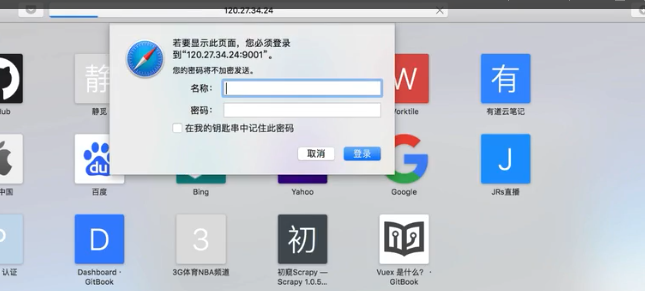

In [ ]:
# 碰见需要登录账号密码的网站
import requests
from requests.auth import HTTPBasicAuth
response = requests.get('http://120.27.34:9001',auth=HTTPBasicAuth('USER','PASSWORD'))
response.status_code

# 异常处理

In [134]:
import requests
from requests.exceptions import ReadTimeout,HTTPError,RequestException,ContentDecodingError
try:
    response = requests.get('http://httpbin.org/get',timeout=0.050)
    print(response.status_code)
except ReadTimeout :
    print('Timeout')
except HTTPError:
    print('httperror')
except ConnectionError:
    print('connectError')
except RequestException:
    print('error')

connectError
